[*********************100%***********************]  1 of 1 completed


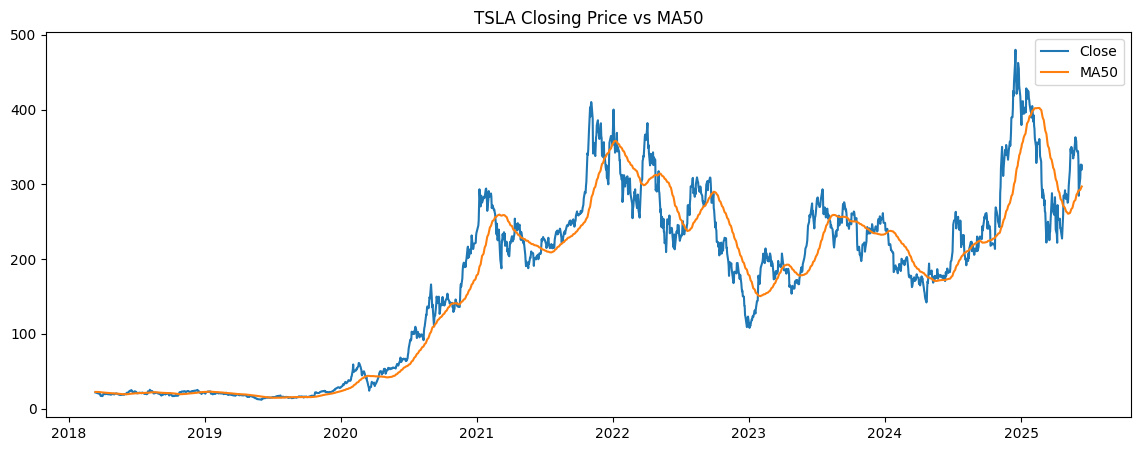

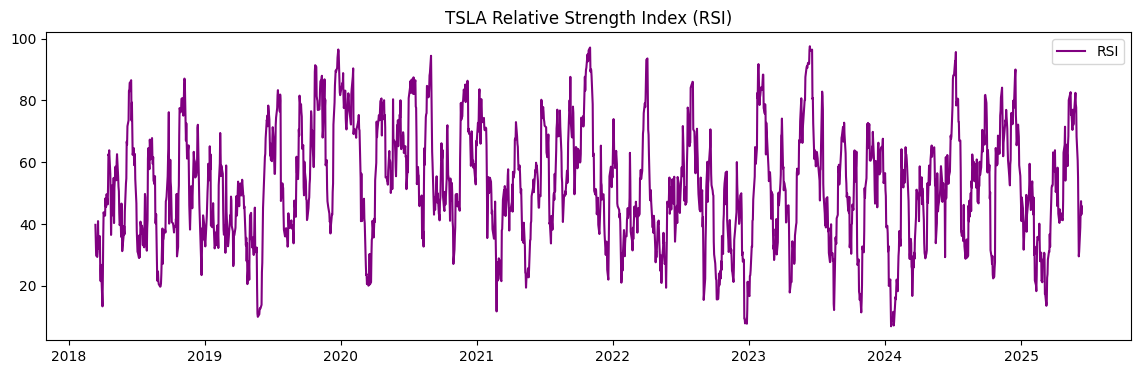

C:\Users\suchi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0434
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0039
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0034
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0032
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0029
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0026
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0024
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0028
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0023
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0023
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


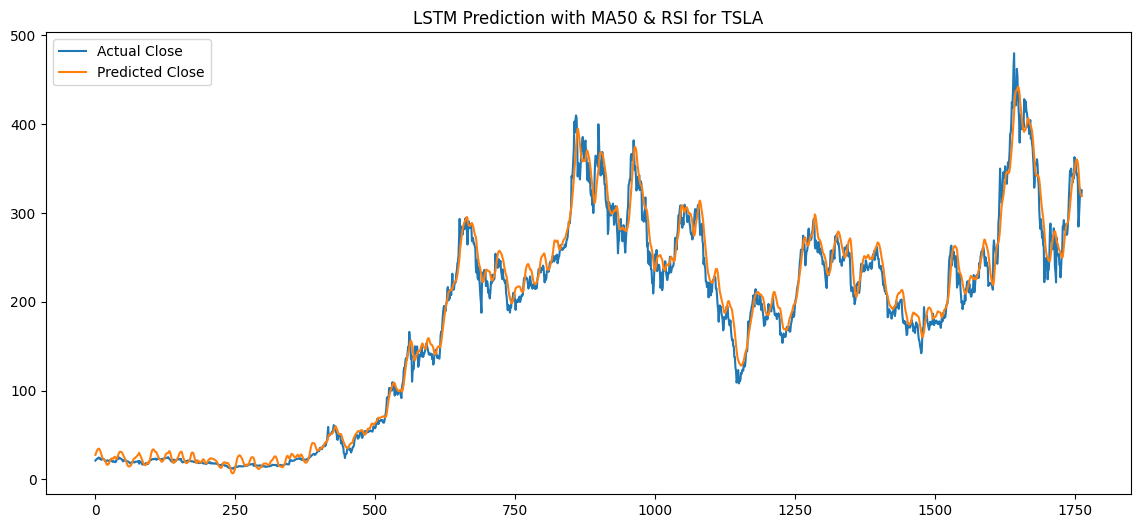

✅ Model saved to model/TSLA_lstm_model.h5


In [1]:
# stock_lstm.ipynb

# 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import os

# 2. Custom Modules
from utils import fetch_stock_data, preprocess_data

# 3. Parameters
ticker = 'TSLA'       # You can change to 'INFY.NS', 'AAPL', etc.
use_live_data = False # Set to True to fetch fresh data (won't work in Streamlit Cloud)

# 4. Load Data
df = fetch_stock_data(ticker, force_live=use_live_data)
X, y, scaler = preprocess_data(df)

# 5. Visualize Data
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label='Close')
plt.plot(df['MA50'], label='MA50')
plt.title(f"{ticker} Closing Price vs MA50")
plt.legend()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(df['RSI'], label='RSI', color='purple')
plt.title(f"{ticker} Relative Strength Index (RSI)")
plt.legend()
plt.show()

# 6. Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# 7. Train Model
model.fit(X, y, epochs=10, batch_size=32, verbose=1)

# 8. Predict
predicted = model.predict(X)
predicted_close = scaler.inverse_transform(
    np.concatenate([predicted, np.zeros((predicted.shape[0], 2))], axis=1)
)[:, 0]
actual_close = scaler.inverse_transform(
    np.concatenate([y.reshape(-1, 1), np.zeros((y.shape[0], 2))], axis=1)
)[:, 0]

# 9. Plot Predictions
plt.figure(figsize=(14, 6))
plt.plot(actual_close, label='Actual Close')
plt.plot(predicted_close, label='Predicted Close')
plt.title(f"LSTM Prediction with MA50 & RSI for {ticker}")
plt.legend()
plt.show()

# 10. Save Model
os.makedirs("model", exist_ok=True)
model.save(f"model/{ticker}_lstm_model.h5")
print(f"✅ Model saved to model/{ticker}_lstm_model.h5")
